In [20]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="-1" # staviti -1 za CPU
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

# import the needed libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# config
img_width, img_height = 28,28 #width & height of input image
input_depth = 1 #1: gray image

train_data_dir = 'TrainingSamoSwe' #data training path

epochs = 20 #number of training epoch
batch_size = 10 #training batch size


list=[]
import os, shutil
for item in os.listdir(train_data_dir):
    s = os.path.join(train_data_dir, item)
    list.append(item)


# define image generator for Keras,
# here, we map pixel intensity to 0-1
train_datagen = ImageDataGenerator(rescale=1/255)


# read image batch by batch
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    color_mode='grayscale',#inpput iameg: gray
    target_size=(img_width,img_height),#input image size
    batch_size=batch_size,#batch size
    class_mode='categorical')#categorical: one-hot encoding format class label

Found 3510 images belonging to 8 classes.


In [21]:
testing_data_dir = 'Test/TestSwe' #data testing path

test_datagen = ImageDataGenerator(rescale=1/255)


testing_generator = test_datagen.flow_from_directory(
    testing_data_dir,
    color_mode='grayscale',
    target_size=(img_width,img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 498 images belonging to 8 classes.


In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Define number of filters and nodes in the fully connected layer
NUMB_FILTER_L1 = 32
NUMB_FILTER_L2 = 64
NUMB_FILTER_L3 = 128
NUMB_NODE_FC_LAYER = 256

# Define input image order shape
input_shape_val = (img_width, img_height, input_depth)

# Define the network
model = Sequential()

# Layer 1
model.add(Conv2D(NUMB_FILTER_L1, (3, 3), input_shape=input_shape_val, padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(NUMB_FILTER_L1, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

# Layer 2
model.add(MaxPool2D((2, 2)))

# Layer 3
model.add(Conv2D(NUMB_FILTER_L2, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(NUMB_FILTER_L2, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

# Layer 4
model.add(MaxPool2D((2, 2)))

# Layer 5
model.add(Conv2D(NUMB_FILTER_L3, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(NUMB_FILTER_L3, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

# Layer 6
model.add(MaxPool2D((2, 2)))

# Flattening the model for fully connected layer
model.add(Flatten())

# Fully connected layer
model.add(Dense(NUMB_NODE_FC_LAYER))
model.add(Activation('relu'))

# Output layer
model.add(Dense(train_generator.num_classes, activation='softmax'))

# Define the optimizer
optimizer = Adam(learning_rate=1e-3)

# Compile the network
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Show the model summary
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 activation_14 (Activation)  (None, 28, 28, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 activation_15 (Activation)  (None, 28, 28, 32)        0         
                                                                 
 batch_normalization_6 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                  

In [23]:
import os
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator


testing_data_dir = 'Test/TestSwe'




all_images = os.listdir(testing_data_dir)


num_validation_images = int(len(all_images) * 0.3)


validation_indices = random.sample(range(len(all_images)), num_validation_images)


test_datagen = ImageDataGenerator(
    rescale=1/255,
    validation_split=0.3
)


test_generator = test_datagen.flow_from_directory(
    testing_data_dir,
    color_mode='grayscale',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'  
)


validation_generator = test_datagen.flow_from_directory(
    testing_data_dir,
    color_mode='grayscale',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation' 
)


SweSwe = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    steps_per_epoch=len(train_generator),
    validation_steps=len(validation_generator)
)


evaluacija_rezultati = model.evaluate(test_generator, steps=len(test_generator))
print("Rezultati evaluacije:", evaluacija_rezultati)


najbolji_test_rezultat = max(SweSwe.history['val_accuracy'])

print("Najbolji val_točnost:", najbolji_test_rezultat)
evaluacija_rezultati = model.evaluate(test_generator, steps=len(test_generator))
print("Rezultati evaluacije:", evaluacija_rezultati)


najbolji_test_rezultat = evaluacija_rezultati[1]
print("Najbolji rezultat za testiranje:", najbolji_test_rezultat)

Epoch 1/10


/tmp/ipykernel_1835244/4164009549.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  SweSwe = model.fit_generator(


351/351 [==============================] - 6s 15ms/step - loss: 0.6480 - accuracy: 0.8026 - val_loss: 0.9604 - val_accuracy: 0.6592
Epoch 2/10
351/351 [==============================] - 5s 15ms/step - loss: 0.2045 - accuracy: 0.9333 - val_loss: 0.1316 - val_accuracy: 0.9429
Epoch 3/10
351/351 [==============================] - 5s 15ms/step - loss: 0.0729 - accuracy: 0.9755 - val_loss: 0.1576 - val_accuracy: 0.9469
Epoch 4/10
351/351 [==============================] - 5s 14ms/step - loss: 0.0659 - accuracy: 0.9778 - val_loss: 0.4678 - val_accuracy: 0.8878
Epoch 5/10
351/351 [==============================] - 5s 15ms/step - loss: 0.0427 - accuracy: 0.9855 - val_loss: 0.0829 - val_accuracy: 0.9755
Epoch 6/10
351/351 [==============================] - 5s 15ms/step - loss: 0.0129 - accuracy: 0.9952 - val_loss: 0.1282 - val_accuracy: 0.9735
Epoch 7/10
351/351 [==============================] - 5s 15ms/step - loss: 0.1120 - accuracy: 0.9652 - val_loss: 0.3555 - val_accuracy: 0.8857
Epoch 8/10

In [24]:
accuracy_history = SweSwe.history['accuracy']
val_accuracy_history = SweSwe.history['val_accuracy']

# Ispis accuracy vrijednosti
print("Accuracy:", accuracy_history)

# Ispis val_accuracy vrijednosti
print("Validation Accuracy:", val_accuracy_history)

Accuracy: [0.8025640845298767, 0.9333333373069763, 0.9754985570907593, 0.9777777791023254, 0.9854700565338135, 0.9951567053794861, 0.9652421474456787, 0.9894586801528931, 0.9948717951774597, 0.9985755085945129]
Validation Accuracy: [0.6591836810112, 0.9428571462631226, 0.9469387531280518, 0.8877550959587097, 0.9755101799964905, 0.9734693765640259, 0.8857142925262451, 0.9653061032295227, 0.9938775300979614, 0.9836734533309937]


In [25]:
best_val_accuracy_Swe = max(SweSwe.history['val_accuracy'])
print('val: ', best_val_accuracy_Swe)


test_loss_swe, test_accuracy_swe = model.evaluate(testing_generator, steps=np.ceil(testing_generator.n / batch_size))

print("Test Loss:", test_loss_swe)
print("Test Accuracy:", test_accuracy_swe)

val:  0.9938775300979614
50/50 [==============================] - 0s 4ms/step - loss: 0.0541 - accuracy: 0.9839
Test Loss: 0.05406792089343071
Test Accuracy: 0.9839357137680054


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


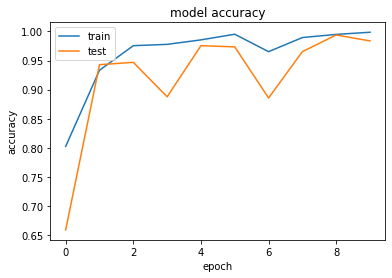

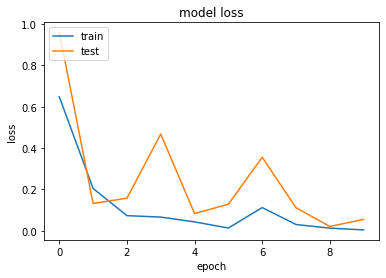

In [26]:
#Swe+Swe
# list all data in history
print(SweSwe.history.keys())
# summarize history for accuracy
plt.plot(SweSwe.history['accuracy'])
plt.plot(SweSwe.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(SweSwe.history['loss'])
plt.plot(SweSwe.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [8]:
testing_data_dir = 'Test/TestGer' #data testing path

test_datagen = ImageDataGenerator(rescale=1/255)


testing_generator = test_datagen.flow_from_directory(
    testing_data_dir,
    color_mode='grayscale',
    target_size=(img_width,img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 2928 images belonging to 8 classes.


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Define number of filters and nodes in the fully connected layer
NUMB_FILTER_L1 = 32
NUMB_FILTER_L2 = 64
NUMB_FILTER_L3 = 128
NUMB_NODE_FC_LAYER = 256

# Define input image order shape
input_shape_val = (img_width, img_height, input_depth)

# Define the network
model = Sequential()

# Layer 1
model.add(Conv2D(NUMB_FILTER_L1, (3, 3), input_shape=input_shape_val, padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(NUMB_FILTER_L1, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

# Layer 2
model.add(MaxPool2D((2, 2)))

# Layer 3
model.add(Conv2D(NUMB_FILTER_L2, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(NUMB_FILTER_L2, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

# Layer 4
model.add(MaxPool2D((2, 2)))

# Layer 5
model.add(Conv2D(NUMB_FILTER_L3, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(NUMB_FILTER_L3, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

# Layer 6
model.add(MaxPool2D((2, 2)))

# Flattening the model for fully connected layer
model.add(Flatten())

# Fully connected layer
model.add(Dense(NUMB_NODE_FC_LAYER))
model.add(Activation('relu'))

# Output layer
model.add(Dense(train_generator.num_classes, activation='softmax'))

# Define the optimizer
optimizer = Adam(learning_rate=1e-3)

# Compile the network
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Show the model summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 activation_7 (Activation)   (None, 28, 28, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 activation_8 (Activation)   (None, 28, 28, 32)        0         
                                                                 
 batch_normalization_3 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                  

In [10]:
#Swe + Ger
import matplotlib.pyplot as plt
SweGer = model.fit_generator(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    steps_per_epoch=len(train_generator),
    validation_steps=len(validation_generator)
    )

Epoch 1/25


/tmp/ipykernel_3369708/1774509461.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  SweGer = model.fit_generator(


351/351 [==============================] - 10s 25ms/step - loss: 0.5959 - accuracy: 0.8236 - val_loss: 1.5691 - val_accuracy: 0.5603
Epoch 2/25
351/351 [==============================] - 9s 25ms/step - loss: 0.1933 - accuracy: 0.9330 - val_loss: 2.3302 - val_accuracy: 0.6178
Epoch 3/25
351/351 [==============================] - 8s 24ms/step - loss: 0.1067 - accuracy: 0.9655 - val_loss: 1.9982 - val_accuracy: 0.5743
Epoch 4/25
351/351 [==============================] - 8s 22ms/step - loss: 0.0604 - accuracy: 0.9789 - val_loss: 2.1410 - val_accuracy: 0.7003
Epoch 5/25
351/351 [==============================] - 8s 24ms/step - loss: 0.0777 - accuracy: 0.9769 - val_loss: 2.6081 - val_accuracy: 0.6815
Epoch 6/25
351/351 [==============================] - 8s 21ms/step - loss: 0.0486 - accuracy: 0.9858 - val_loss: 1.9766 - val_accuracy: 0.6531
Epoch 7/25
351/351 [==============================] - 9s 24ms/step - loss: 0.0354 - accuracy: 0.9872 - val_loss: 2.5607 - val_accuracy: 0.5918
Epoch 8/2

In [11]:
best_val_accuracy_Ger = max(SweGer.history['val_accuracy'])
print('val: ', best_val_accuracy_Ger)


test_loss_ger, test_accuracy_ger = model.evaluate(testing_generator, steps=np.ceil(testing_generator.n / batch_size))

print("Test Loss:", test_loss_ger)
print("Test Accuracy:", test_accuracy_ger)

val:  0.7702054977416992
293/293 [==============================] - 2s 5ms/step - loss: 1.9126 - accuracy: 0.7633
Test Loss: 1.9125901460647583
Test Accuracy: 0.7633196711540222


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


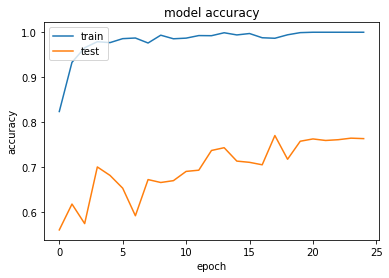

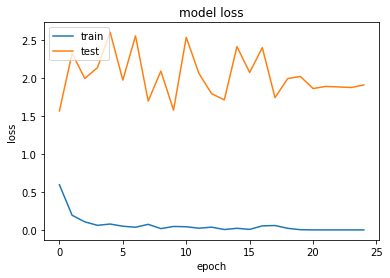

In [12]:
#Swe + Ger
# list all data in history
print(SweGer.history.keys())
# summarize history for accuracy
plt.plot(SweGer.history['accuracy'])
plt.plot(SweGer.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(SweGer.history['loss'])
plt.plot(SweGer.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [13]:
testing_data_dir = 'Test/TestBel' #data testing path

test_datagen = ImageDataGenerator(rescale=1/255)


testing_generator = test_datagen.flow_from_directory(
    testing_data_dir,
    color_mode='grayscale',
    target_size=(img_width,img_height),
    batch_size=batch_size,
    class_mode='categorical')


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Define number of filters and nodes in the fully connected layer
NUMB_FILTER_L1 = 32
NUMB_FILTER_L2 = 64
NUMB_FILTER_L3 = 128
NUMB_NODE_FC_LAYER = 256

# Define input image order shape
input_shape_val = (img_width, img_height, input_depth)

# Define the network
model = Sequential()

# Layer 1
model.add(Conv2D(NUMB_FILTER_L1, (3, 3), input_shape=input_shape_val, padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(NUMB_FILTER_L1, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

# Layer 2
model.add(MaxPool2D((2, 2)))

# Layer 3
model.add(Conv2D(NUMB_FILTER_L2, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(NUMB_FILTER_L2, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

# Layer 4
model.add(MaxPool2D((2, 2)))

# Layer 5
model.add(Conv2D(NUMB_FILTER_L3, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(NUMB_FILTER_L3, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

# Layer 6
model.add(MaxPool2D((2, 2)))

# Flattening the model for fully connected layer
model.add(Flatten())

# Fully connected layer
model.add(Dense(NUMB_NODE_FC_LAYER))
model.add(Activation('relu'))

# Output layer
model.add(Dense(train_generator.num_classes, activation='softmax'))

# Define the optimizer
optimizer = Adam(learning_rate=1e-3)

# Compile the network
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Show the model summary
model.summary()


Found 474 images belonging to 8 classes.
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 activation_14 (Activation)  (None, 28, 28, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 activation_15 (Activation)  (None, 28, 28, 32)        0         
                                                                 
 batch_normalization_6 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 32)       0         
 2D)         

Epoch 1/25


/tmp/ipykernel_3369708/1538265049.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  SweBel = model.fit_generator(


351/351 [==============================] - 8s 20ms/step - loss: 0.5174 - accuracy: 0.8459 - val_loss: 1.2543 - val_accuracy: 0.6149
Epoch 2/25
351/351 [==============================] - 7s 21ms/step - loss: 0.1489 - accuracy: 0.9513 - val_loss: 1.8764 - val_accuracy: 0.6319
Epoch 3/25
351/351 [==============================] - 7s 20ms/step - loss: 0.0904 - accuracy: 0.9689 - val_loss: 1.8064 - val_accuracy: 0.6702
Epoch 4/25
351/351 [==============================] - 7s 20ms/step - loss: 0.0436 - accuracy: 0.9821 - val_loss: 3.1244 - val_accuracy: 0.6787
Epoch 5/25
351/351 [==============================] - 7s 21ms/step - loss: 0.0720 - accuracy: 0.9798 - val_loss: 2.6286 - val_accuracy: 0.7000
Epoch 6/25
351/351 [==============================] - 7s 20ms/step - loss: 0.0350 - accuracy: 0.9892 - val_loss: 1.4249 - val_accuracy: 0.7809
Epoch 7/25
351/351 [==============================] - 7s 21ms/step - loss: 0.0461 - accuracy: 0.9877 - val_loss: 0.6621 - val_accuracy: 0.8702
Epoch 8/25

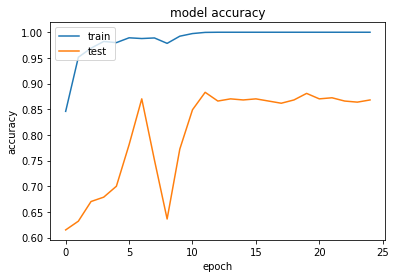

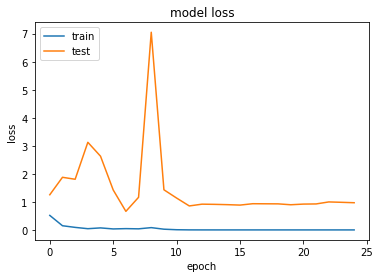

In [14]:
#Fra + Bel
import matplotlib.pyplot as plt
SweBel = model.fit_generator(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    steps_per_epoch=len(train_generator),
    validation_steps=len(validation_generator)
    )

best_val_accuracy_Bel = max(SweBel.history['val_accuracy'])
print('val: ', best_val_accuracy_Bel)


test_loss_bel, test_accuracy_bel = model.evaluate(testing_generator, steps=np.ceil(testing_generator.n / batch_size))

print("Test Loss:", test_loss_bel)
print("Test Accuracy:", test_accuracy_bel)

#Fra + Bel
# list all data in history
print(SweBel.history.keys())
# summarize history for accuracy
plt.plot(SweBel.history['accuracy'])
plt.plot(SweBel.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(SweBel.history['loss'])
plt.plot(SweBel.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [15]:
testing_data_dir = 'Test/TestFra' #data testing path

test_datagen = ImageDataGenerator(rescale=1/255)


testing_generator = test_datagen.flow_from_directory(
    testing_data_dir,
    color_mode='grayscale',
    target_size=(img_width,img_height),
    batch_size=batch_size,
    class_mode='categorical')


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Define number of filters and nodes in the fully connected layer
NUMB_FILTER_L1 = 32
NUMB_FILTER_L2 = 64
NUMB_FILTER_L3 = 128
NUMB_NODE_FC_LAYER = 256

# Define input image order shape
input_shape_val = (img_width, img_height, input_depth)

# Define the network
model = Sequential()

# Layer 1
model.add(Conv2D(NUMB_FILTER_L1, (3, 3), input_shape=input_shape_val, padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(NUMB_FILTER_L1, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

# Layer 2
model.add(MaxPool2D((2, 2)))

# Layer 3
model.add(Conv2D(NUMB_FILTER_L2, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(NUMB_FILTER_L2, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

# Layer 4
model.add(MaxPool2D((2, 2)))

# Layer 5
model.add(Conv2D(NUMB_FILTER_L3, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(NUMB_FILTER_L3, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

# Layer 6
model.add(MaxPool2D((2, 2)))

# Flattening the model for fully connected layer
model.add(Flatten())

# Fully connected layer
model.add(Dense(NUMB_NODE_FC_LAYER))
model.add(Activation('relu'))

# Output layer
model.add(Dense(train_generator.num_classes, activation='softmax'))

# Define the optimizer
optimizer = Adam(learning_rate=1e-3)

# Compile the network
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Show the model summary
model.summary()


Found 122 images belonging to 8 classes.
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 activation_21 (Activation)  (None, 28, 28, 32)        0         
                                                                 
 conv2d_19 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 activation_22 (Activation)  (None, 28, 28, 32)        0         
                                                                 
 batch_normalization_9 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 14, 14, 32)       0         
 2D)         

Epoch 1/25


/tmp/ipykernel_3369708/3891418333.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  SweFra = model.fit_generator(


351/351 [==============================] - 8s 21ms/step - loss: 0.5544 - accuracy: 0.8422 - val_loss: 1.9209 - val_accuracy: 0.4917
Epoch 2/25
351/351 [==============================] - 7s 19ms/step - loss: 0.1525 - accuracy: 0.9473 - val_loss: 1.7333 - val_accuracy: 0.6167
Epoch 3/25
351/351 [==============================] - 7s 19ms/step - loss: 0.0692 - accuracy: 0.9766 - val_loss: 1.6716 - val_accuracy: 0.6333
Epoch 4/25
351/351 [==============================] - 7s 19ms/step - loss: 0.0527 - accuracy: 0.9806 - val_loss: 2.0048 - val_accuracy: 0.6500
Epoch 5/25
351/351 [==============================] - 7s 20ms/step - loss: 0.0928 - accuracy: 0.9746 - val_loss: 0.9397 - val_accuracy: 0.7500
Epoch 6/25
351/351 [==============================] - 7s 19ms/step - loss: 0.0293 - accuracy: 0.9912 - val_loss: 2.2072 - val_accuracy: 0.7250
Epoch 7/25
351/351 [==============================] - 7s 20ms/step - loss: 0.0152 - accuracy: 0.9954 - val_loss: 2.3490 - val_accuracy: 0.7083
Epoch 8/25

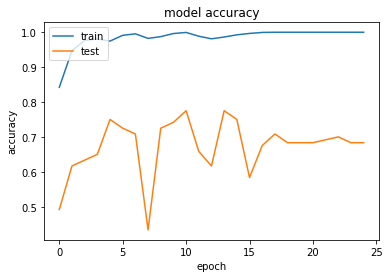

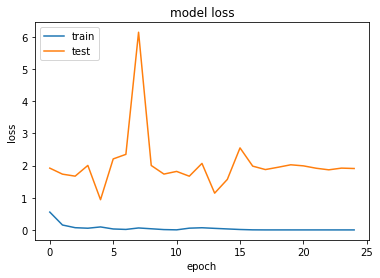

In [16]:
#Swe + Fra
import matplotlib.pyplot as plt
SweFra = model.fit_generator(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    steps_per_epoch=len(train_generator),
    validation_steps=len(validation_generator)
    )

best_val_accuracy_Fra = max(SweFra.history['val_accuracy'])
print('val: ', best_val_accuracy_Fra)


test_loss_fra, test_accuracy_fra = model.evaluate(testing_generator, steps=np.ceil(testing_generator.n / batch_size))

print("Test Loss:", test_loss_fra)
print("Test Accuracy:", test_accuracy_fra)

#Fra + Swe
# list all data in history
print(SweFra.history.keys())
# summarize history for accuracy
plt.plot(SweFra.history['accuracy'])
plt.plot(SweFra.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(SweFra.history['loss'])
plt.plot(SweFra.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [17]:
testing_data_dir = 'Test/TestCro' #data testing path

test_datagen = ImageDataGenerator(rescale=1/255)


testing_generator = test_datagen.flow_from_directory(
    testing_data_dir,
    color_mode='grayscale',
    target_size=(img_width,img_height),
    batch_size=batch_size,
    class_mode='categorical')


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Define number of filters and nodes in the fully connected layer
NUMB_FILTER_L1 = 32
NUMB_FILTER_L2 = 64
NUMB_FILTER_L3 = 128
NUMB_NODE_FC_LAYER = 256

# Define input image order shape
input_shape_val = (img_width, img_height, input_depth)

# Define the network
model = Sequential()

# Layer 1
model.add(Conv2D(NUMB_FILTER_L1, (3, 3), input_shape=input_shape_val, padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(NUMB_FILTER_L1, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

# Layer 2
model.add(MaxPool2D((2, 2)))

# Layer 3
model.add(Conv2D(NUMB_FILTER_L2, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(NUMB_FILTER_L2, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

# Layer 4
model.add(MaxPool2D((2, 2)))

# Layer 5
model.add(Conv2D(NUMB_FILTER_L3, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(NUMB_FILTER_L3, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

# Layer 6
model.add(MaxPool2D((2, 2)))

# Flattening the model for fully connected layer
model.add(Flatten())

# Fully connected layer
model.add(Dense(NUMB_NODE_FC_LAYER))
model.add(Activation('relu'))

# Output layer
model.add(Dense(train_generator.num_classes, activation='softmax'))

# Define the optimizer
optimizer = Adam(learning_rate=1e-3)

# Compile the network
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Show the model summary
model.summary()


Found 634 images belonging to 8 classes.
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 activation_28 (Activation)  (None, 28, 28, 32)        0         
                                                                 
 conv2d_25 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 activation_29 (Activation)  (None, 28, 28, 32)        0         
                                                                 
 batch_normalization_12 (Bat  (None, 28, 28, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)        

Epoch 1/50


/tmp/ipykernel_3369708/1889671323.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  SweCro = model.fit_generator(


351/351 [==============================] - 8s 21ms/step - loss: 0.6684 - accuracy: 0.8026 - val_loss: 3.8036 - val_accuracy: 0.3063
Epoch 2/50
351/351 [==============================] - 7s 21ms/step - loss: 0.1997 - accuracy: 0.9342 - val_loss: 2.1401 - val_accuracy: 0.5952
Epoch 3/50
351/351 [==============================] - 7s 20ms/step - loss: 0.1170 - accuracy: 0.9644 - val_loss: 2.9509 - val_accuracy: 0.5651
Epoch 4/50
351/351 [==============================] - 7s 20ms/step - loss: 0.0673 - accuracy: 0.9783 - val_loss: 1.6767 - val_accuracy: 0.6794
Epoch 5/50
351/351 [==============================] - 7s 21ms/step - loss: 0.0450 - accuracy: 0.9838 - val_loss: 1.1370 - val_accuracy: 0.7381
Epoch 6/50
351/351 [==============================] - 7s 20ms/step - loss: 0.0317 - accuracy: 0.9889 - val_loss: 1.8399 - val_accuracy: 0.6000
Epoch 7/50
351/351 [==============================] - 7s 20ms/step - loss: 0.0264 - accuracy: 0.9897 - val_loss: 5.8545 - val_accuracy: 0.3778
Epoch 8/50

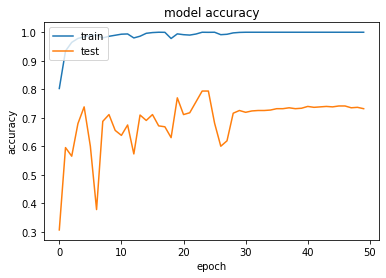

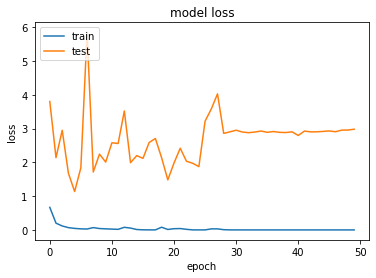

In [18]:
#Swe + Cro
import matplotlib.pyplot as plt
SweCro = model.fit_generator(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    steps_per_epoch=len(train_generator),
    validation_steps=len(validation_generator)
    )

best_val_accuracy_Cro = max(SweCro.history['val_accuracy'])
print('val: ', best_val_accuracy_Cro)


test_loss_cro, test_accuracy_cro = model.evaluate(testing_generator, steps=np.ceil(testing_generator.n / batch_size))

print("Test Loss:", test_loss_cro)
print("Test Accuracy:", test_accuracy_cro)

#Fra + Cro
# list all data in history
print(SweCro.history.keys())
# summarize history for accuracy
plt.plot(SweCro.history['accuracy'])
plt.plot(SweCro.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(SweCro.history['loss'])
plt.plot(SweCro.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [19]:
#Dodane slike u Training
import pandas as pd

best_results = []


best_results.append({'Training Švedska': 'Swe', 'Best Val_Accuracy': best_val_accuracy_Swe, 'Best Test Accuracy':test_accuracy_swe})
best_results.append({'Training Švedska': 'Ger', 'Best Val_Accuracy': best_val_accuracy_Ger, 'Best Test Accuracy':test_accuracy_ger})
best_results.append({'Training Švedska': 'Bel', 'Best Val_Accuracy': best_val_accuracy_Bel, 'Best Test Accuracy':test_accuracy_bel})
best_results.append({'Training Švedska': 'Cro', 'Best Val_Accuracy': best_val_accuracy_Cro, 'Best Test Accuracy':test_accuracy_cro})
best_results.append({'Training Švedska': 'Fra', 'Best Val_Accuracy': best_val_accuracy_Fra, 'Best Test Accuracy':test_accuracy_fra})
df = pd.DataFrame(best_results)
print(df)   

  Training Švedska  Best Val_Accuracy  Best Test Accuracy
0              Swe           0.991837            0.989960
1              Ger           0.770205            0.763320
2              Bel           0.882979            0.869198
3              Cro           0.793651            0.733438
4              Fra           0.775000            0.688525


In [29]:
import pandas as pd

best_results = []


best_results.append({'Training Švedska': 'Swe', 'Best Val_Accuracy': best_val_accuracy_Swe, 'Best Test Accuracy':test_accuracy_swe})
best_results.append({'Training Švedska': 'Ger', 'Best Val_Accuracy': best_val_accuracy_Ger, 'Best Test Accuracy':test_accuracy_ger})
best_results.append({'Training Švedska': 'Bel', 'Best Val_Accuracy': best_val_accuracy_Bel, 'Best Test Accuracy':test_accuracy_bel})
best_results.append({'Training Švedska': 'Cro', 'Best Val_Accuracy': best_val_accuracy_Cro, 'Best Test Accuracy':test_accuracy_cro})
best_results.append({'Training Švedska': 'Fra', 'Best Val_Accuracy': best_val_accuracy_Fra, 'Best Test Accuracy':test_accuracy_fra})
df = pd.DataFrame(best_results)
print(df)   

  Training Švedska  Best Val_Accuracy  Best Test Accuracy
0              Swe           0.991837            0.987952
1              Ger           0.690753            0.663934
2              Bel           0.768085            0.753165
3              Cro           0.714286            0.640379
4              Fra           0.750000            0.721311


In [1]:
#dodavanje slika u trening skup
import cv2
import os

folder_path = 'TrainingSamoSwe'
for root, dirs, files in os.walk(folder_path):
    for filename in files:
        if filename.endswith(".ppm"):
            file_path = os.path.join(root, filename)
            image = cv2.imread(file_path)

            # Izokretanje slike
            flipped_image = cv2.flip(image, 1)  # 1 označava izokretanje horizontalno

            # Rotacija slike
            rotation_angle = 30
            rotation_matrix = cv2.getRotationMatrix2D((image.shape[1] / 2, image.shape[0] / 2), rotation_angle, 1)
            rotated_image = cv2.warpAffine(image, rotation_matrix, (image.shape[1], image.shape[0]))

            # Spremanje izokrenutih i rotiranih slika u isti direktorij
            cv2.imwrite(os.path.join(root, "flipped_" + filename), flipped_image)
            cv2.imwrite(os.path.join(root, "rotated_" + filename), rotated_image)